In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
from scipy import stats

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

# Quarta parte – Análise da variável Renda em função da variável Opinião

## Questão 4
Há interesse em avaliar a Renda dos alunos em função da sua Opinião sobre o curso. Mas contrariando a prática usual resolveu-se agrupar os valores de Opinião, criando uma nova variável OpiniãoC, na qual os valores Muito insatisfeito, Insatisfeito e Indiferente passarão a ser INSATISFEITO e os valores Satisfeito e Muito satisfeito passarão a ser SATISFEITO.

In [2]:
df["OpiniãoC"] = df["Opinião"].apply(lambda x: "SATISFEITO" if (x == "Satisfeito" or x == "Muito satisfeito") else "INSATISFEITO")

### b) Classifique o arquivo de dados em função dos valores de OpiniãoC5.
Não é necessário

### c) Retire uma amostra aleatória de 15 rendas de alunos com OpiniãoC INSATISFEITO.
Feito a seguir

### d) Retire uma amostra aleatória de 15 rendas de alunos com OpiniãoC SATISFEITO.

In [3]:
# N = 15

# # Garante que sempre serão gerados os mesmos números aleatórios
# np.random.seed(0)

# # Insere os samples num dataframe
# df_sample = pd.DataFrame()

# # Retira 15 samples de opiniões insatisfeitas
# df_sample["Insatisfeito"] = np.random.choice(df[df["OpiniãoC"] == "INSATISFEITO"]["Renda"].dropna().tolist(), N)

# # Retira 15 samples de opiniões satisfeitas
# df_sample["Satisfeito"] = np.random.choice(df[df["OpiniãoC"] == "SATISFEITO"]["Renda"].dropna().tolist(), N)

# df_sample.describe()

In [4]:
N = 15

# Garante que sempre serão gerados os mesmos números aleatórios
seed = 2

# Retira 15 samples de opiniões insatisfeitas
df_sampleInsatisfeito = df[df["OpiniãoC"] == "INSATISFEITO"].sample(n=N, random_state=seed)
# Grava a tabela em um arquivo csv
df_sampleInsatisfeito.to_csv("Dados\Q4_insatisfeitos_completo.csv", encoding='utf-8', index=True)

# Retira 15 samples de opiniões satisfeitas
df_sampleSatisfeito = df[df["OpiniãoC"] == "SATISFEITO"].sample(n=N, random_state=seed)
# Grava a tabela em um arquivo csv
df_sampleSatisfeito.to_csv("Dados\Q4_satisfeitos_completo.csv", encoding='utf-8', index=True)

# Insere os samples num dataframe
df_sample = pd.DataFrame()
df_sample["Insatisfeito"] = df_sampleInsatisfeito["Renda"].tolist()
df_sample["Satisfeito"] = df_sampleSatisfeito["Renda"].tolist()

# Grava a tabela em um arquivo csv
df_sample.to_csv("Dados\Q4_comparacao_de_renda.csv", encoding='utf-8', index=True)
df_sample.describe().to_csv("Dados\Q4_comparacao_de_renda_sumario.csv", encoding='utf-8', index=True)

df_sample.describe()

,Insatisfeito,Satisfeito
count,15.000000,15.000000
mean,2.367333,1.379333
std,0.945648,0.463303
min,1.120000,1.010000
25%,1.790000,1.090000
50%,2.190000,1.240000
75%,2.640000,1.365000
max,4.590000,2.500000


### e) SUPONHA que as rendas são provenientes de uma distribuição normal, e que as variâncias populacionais são DESCONHECIDAS.

### e.1 – Obtenha os intervalos de 95% de confiança para as médias das rendas com OpiniãoC INSATISFEITO e SATISFEITO. Interprete os resultados.

In [61]:
# Calcula parâmetros amostrais (média e desvio padrão)
ins_mean = df_sample["Insatisfeito"].mean()
sat_mean = df_sample["Satisfeito"].mean()
ins_std = df_sample["Insatisfeito"].std()
sat_std = df_sample["Satisfeito"].std()

# Calcula os intervalos de confiança
tc = stats.t.ppf(1-0.05/2, dfreedom)
error_sa = tc * sat_std / math.sqrt(N)
error_in = tc * ins_std / math.sqrt(N)

print("Para o indíce de confiança de 95% sobre as amostras de alunos satisfeios, foi encontrado um erro de {0:.2f} sobre a média amostral {1:.2f}, produzindo um intervalo de {2:.2f} a {3:.2f}".format(
        error_sa, sat_mean, sat_mean - error_sa, sat_mean + error_sa))
print("Para o indíce de confiança de 95% sobre as amostras de alunos insatisfeios, foi encontrado um erro de {0:.2f} sobre a média amostral {1:.2f}, produzindo um intervalo de {2:.2f} a {3:.2f}".format(
        error_in, ins_mean, ins_mean - error_in, ins_mean + error_in))

Para o indíce de confiança de 95% sobre as amostras de alunos satisfeios, foi encontrado um erro de 0.26 sobre a média amostral 1.38, produzindo um intervalo de 1.12 a 1.64
Para o indíce de confiança de 95% sobre as amostras de alunos insatisfeios, foi encontrado um erro de 0.52 sobre a média amostral 2.37, produzindo um intervalo de 1.84 a 2.89


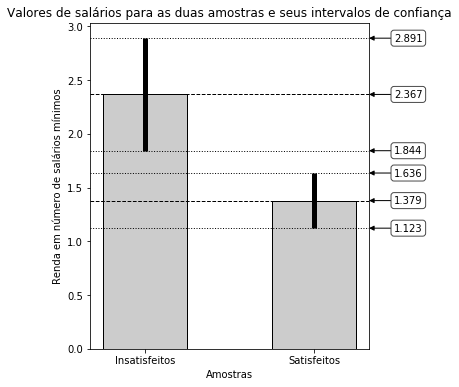

In [179]:
fig, ax = plt.subplots(figsize=(5,6)) 

ax.bar(x=["Insatisfeitos", "Satisfeitos"], height=[ins_mean, sat_mean], yerr = [error_in, error_sa], width = 0.5, color=default_color, edgecolor = "black", 
               error_kw=dict(elinewidth=5, edgecolor=0.4))
ax.set(xlabel="Amostras", ylabel="Renda em número de salários mínimos", title="Valores de salários para as duas amostras e seus intervalos de confiança")

# Insere linhas dos limites dos intervalos
ax.axhline(y=ins_mean + error_in, color='black', linestyle=':', lw=1)
ax.axhline(y=ins_mean, color='black', linestyle='--', lw=1)
ax.axhline(y=ins_mean - error_in, color='black', linestyle=':', lw=1)
ax.axhline(y=sat_mean + error_sa, color='black', linestyle=':', lw=1)
ax.axhline(y=sat_mean, color='black', linestyle='--', lw=1)
ax.axhline(y=sat_mean - error_sa, color='black', linestyle=':', lw=1)

ax.annotate(str(round(ins_mean + error_in,3)), xy=(1, ins_mean + error_in), xytext=(25, 0),
        xycoords=('axes fraction', 'data'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
ax.annotate(str(round(ins_mean,3)), xy=(1, ins_mean), xytext=(25, 0),
    xycoords=('axes fraction', 'data'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
    arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
ax.annotate(str(round(ins_mean - error_in,3)), xy=(1, ins_mean - error_in), xytext=(25, 0),
        xycoords=('axes fraction', 'data'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
ax.annotate(str(round(sat_mean + error_sa,3)), xy=(1, sat_mean + error_sa), xytext=(25, 0),
        xycoords=('axes fraction', 'data'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
ax.annotate(str(round(sat_mean,3)), xy=(1, sat_mean), xytext=(25, 0),
        xycoords=('axes fraction', 'data'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
ax.annotate(str(round(sat_mean - error_sa,3)), xy=(1, sat_mean - error_sa), xytext=(25, 0),
        xycoords=('axes fraction', 'data'), textcoords='offset points', horizontalalignment="left", verticalalignment='center',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
    

# Salva figura na pasta dedicada
plt.savefig('Dados\Q4e1.png', bbox_inches='tight', dpi=dpi)

### e.2 – Com base nos resultados do item e.1 há evidência de que as médias das rendas são diferentes entre alunos com OpiniãoC INSATISFEITO e SATISFEITO? JUSTIFIQUE.

Há sim!

### e.3 – Aplique o teste de hipóteses apropriado e verifique se há indicação de diferença entre as variâncias de rendas de alunos com OpiniãoC INSATISFEITO e SATISFEITO. Use 5% de significância.

Text(0,-25,'f_c2 = 2.979')

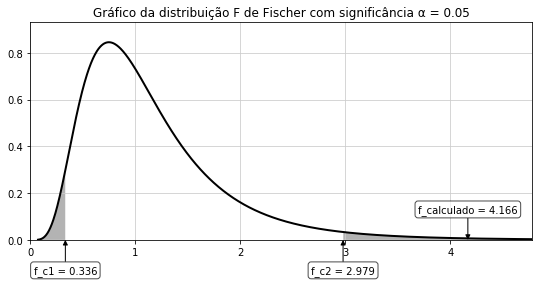

In [50]:
alpha = 0.05
df1, df2 = 14, 14
s1 = df_sample["Insatisfeito"].std()**2
s2 = df_sample["Satisfeito"].std()**2
F = s1/s2

fig, ax = plt.subplots(figsize=(9,4))    
fc1 = stats.f.ppf(alpha/2, df1, df2)
fc2 = stats.f.ppf(1-alpha/2, df1, df2)

x = np.linspace(stats.f.ppf(0.00001, df1, df2), stats.f.ppf(0.997, df1, df2), 1000)
y = stats.f(df1, df2).pdf(x)

ax.plot(x, y, 'k-', lw=2, label='Distribuição F')

ax.fill_between(x[x < fc1], 0, stats.f.pdf(x[x < fc1], df1, df2), facecolor='0.7')
ax.fill_between(x[x > fc2], 0, stats.f.pdf(x[x > fc2], df1, df2), facecolor='0.7')
ax.set(xbound =(0, x.max()), ybound = (0,y.max()*1.1))

ax.grid(color=default_grid_color)
ax.set(title="Gráfico da distribuição F de Fischer com significância α = 0.05")

# Insere anotação sobre a linha de f dos samples
ax.annotate('f_calculado = {:0.3f}'.format(F), xy=(F, 0), xytext=(0, 25),
        xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='bottom',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))

# Insere anotação sobre a linha de f critico
ax.annotate('f_c1 = ' + str(round(fc1,3)), xy=(fc1, 0), xytext=(0, -25),
        xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='top',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    


# Insere anotação sobre a linha de f critico
ax.annotate('f_c2 = ' + str(round(fc2,3)), xy=(fc2, 0), xytext=(0, -25),
        xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='top',
        arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
    

Conclui-se que as variâncias são diferentes.

### e.4 – Com base nos resultados do item e.3, aplique o teste de hipóteses apropriado e verifique se há evidência de que as médias das rendas são diferentes entre alunos com OpiniãoC INSATIFEITO e SATISFEITO. Use 5% de significância.

H0: Variância dos dois grupos são iguais
    
H1: Variância dos dois grupos são diferentes

α = 0.05

Como as variâncias são diferentes, será escolhido o teste t para 2 amostras independentes com v graus de liberdade


### e.5 – Compare os resultados dos itens e.2 e e.4. Eles chegam à mesma conclusão sobre a diferença entre as médias? JUSTIFIQUE.

### e.6 – Calcule o poder do teste para as seguintes diferenças entre as médias das rendas (em desvios padrões) dos alunos com OpiniãoC INSATISFEITO e SATISFEITO:
### -3 -2,5 -2 -1,5 -1 -0,5 0,5 1,0 1,5 2 2,5 3
### Use 5% de significância. Use como estimativa do desvio padrão populacional o desvio agrupado calculado a partir dos desvios padrões e tamanho de cada subgrupo no teste de diferença de médias do item e.4.

### e.7 – Repita o item e.6 para tamanhos de amostra 20, 30 e 60 elementos em cada grupo, supondo que o desvio padrão agrupado permanece o mesmo). Construa um gráfico com os valores de média e poder do teste para os diferentes tamanhos de amostra (curva característica de operação). Analise os resultados e recomende qual seria o tamanho de amostra mais apropriado conciliando poder do teste e economia na amostragem. JUSTIFIQUE.